In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [13]:
X=pd.read_csv('Logistic_X_Train.csv')
Y=pd.read_csv('Logistic_Y_Train.csv')
X_Test=pd.read_csv('Logistic_X_Test.csv')


In [14]:
#normalisation
print(X)

            f1        f2        f3
0    -1.239375  0.749101 -0.528515
1    -1.036070  0.801436 -1.283712
2    -0.615579  1.579521 -1.391927
3     1.335978  1.348651  1.433564
4     0.658925  1.300019  0.571603
...        ...       ...       ...
2995 -0.455628  1.302303 -1.338027
2996 -0.434551  1.597813 -1.748643
2997  0.088277  1.638789 -2.193641
2998  1.525155  0.859234  1.505308
2999 -0.979817  0.563954 -1.539394

[3000 rows x 3 columns]


In [15]:
u=X.mean()
std=X.std()
X=(X-u)/std
print(X)

            f1        f2        f3
0    -0.934557 -0.244356 -0.461327
1    -0.782171 -0.193241 -1.085685
2    -0.466993  0.566716 -1.175152
3     0.995792  0.341225  1.160818
4     0.488309  0.293726  0.448193
...        ...       ...       ...
2995 -0.347101  0.295957 -1.130590
2996 -0.331303  0.584583 -1.470066
2997  0.060581  0.624604 -1.837967
2998  1.137590 -0.136789  1.220132
2999 -0.740007 -0.425190 -1.297070

[3000 rows x 3 columns]


In [18]:
type(X)

pandas.core.frame.DataFrame

In [20]:
X=np.array(X)
Y=np.array(Y)
X_Test=np.array(X_Test)

In [21]:
print(type(X_Test))

<class 'numpy.ndarray'>


In [24]:
print(X_Test)  
print(X)
print(Y)

[[-0.76750773 -0.2618595  -2.51483147]
 [-1.24165258  1.44900144 -0.4130893 ]
 [ 1.92527007  1.93176097  1.34261917]
 ...
 [-1.18696873  0.94734729 -0.78638597]
 [-0.53232395  1.84516978 -0.9935503 ]
 [ 0.54023217  0.58099406  0.38664901]]
[[-0.93455727 -0.24435621 -0.46132724]
 [-0.78217091 -0.19324065 -1.08568474]
 [-0.46699268  0.56671625 -1.17515175]
 ...
 [ 0.06058085  0.62460396 -1.83796701]
 [ 1.13759    -0.13678922  1.2201323 ]
 [-0.74000672 -0.42519048 -1.29706993]]
[[1]
 [1]
 [1]
 ...
 [1]
 [0]
 [1]]


In [96]:
def hypothesis(x,w,b):
    #accepts input vector x,input vector theta(called weight w) and bais b
    h=np.dot(x,w)+b
    return sigmoid(h)

def sigmoid(z):
    return 1.0/(1.0+np.exp(-1.0*z))

def error(y_true,x,w,b):
    m=x.shape[0]
    err=0.0
    for i in range(m):
        hx=hypothesis(x[i],w,b)
        err+=y_true[i]*np.log2(hx)+(1-y_true[i])*np.log2(1-hx)
    
    return -err/m

def get_grads(y_true,x,w,b):
    grad_w=np.zeros(w.shape)
    grad_b=0.0
    m=x.shape[0]
    
    
    for i in range(m):
        hx=hypothesis(x[i],w,b)
        
        grad_w+=(y_true[i]-hx)*x[i]
        grad_b+=(y_true[i]-hx)       #bcz x[0]=1
        
    grad_w/=m
    grad_b/=m
    
    return [grad_w,grad_b]
     
#One iteration of gradient descent    
def grad_descent(x,y_true,w,b,learning_rate=0.1):
    
    err=error(y_true,x,w,b)
    [grad_w,grad_b]=get_grads(y_true,x,w,b)
    
    w =w +learning_rate*grad_w
    b =b +learning_rate*grad_b
    
    return err,w,b
    
def predict(x,w,b):
    
    confidence=hypothesis(x,w,b)
    if confidence<0.5:
        return 0
    else:
        return 1

def get_acc(x_tst,y_tst,w,b):
    y_pred=[]
    
    for i in range(y_tst.shape[0]):
        p=predict(x_tst[i],w,b)
        y_pred.append(p)
        
    y_pred=np.array(y_pred)
    
    return float(np.sum((y_pred==y_tst))/y_tst.shape[0])
    
    

In [97]:
#Splitting given data into test and train
print(X.shape)
print(Y.shape)

(3000, 3)
(3000, 1)


In [98]:
split = int(0.8*X.shape[0])
X_train = X[:split,:]
X_test = X[split:,:]

Y_train = Y[:split,:]
Y_test  = Y[split:,:]

print(X_train.shape,X_test.shape)
print(Y_train.shape,Y_test.shape)

(2400, 3) (600, 3)
(2400, 1) (600, 1)


In [99]:
loss=[]
acc=[]

W=2*np.random.random((X_train.shape[1],))
b=5*np.random.random()


In [100]:
for i in range(100):
    l,W,b=grad_descent(X_train,Y_train,W,b,learning_rate=0.5)
    acc.append(get_acc(X_test,Y_test,W,b))
    loss.append(l)

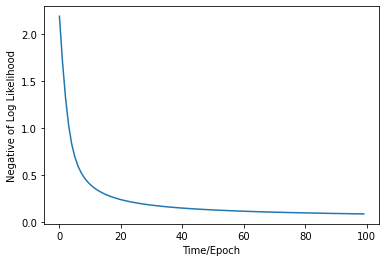

In [101]:
#print(loss)
plt.plot(loss)
plt.xlabel("Time/Epoch")
plt.ylabel("Negative of Log Likelihood")
plt.show()

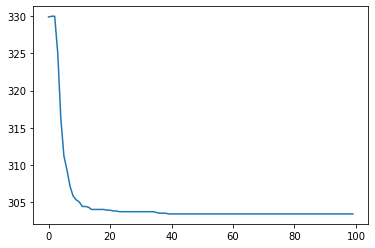

In [102]:
plt.plot(acc)
plt.show()


In [103]:
print(acc[-1])

303.4


In [104]:
print(W,b)

[-2.48618487  1.37454344 -2.36348708] [-0.33892242]


In [115]:
X_Test=pd.read_csv('Logistic_X_Test.csv')
X_Test=np.array(X_Test)

res=[]
for i in X_Test:
    p=predict(i,W,b)
    res.append(p)
    
type(res)
res=np.array(res)
print(res[:5])

[1 1 0 1 1]


In [116]:
df=pd.DataFrame(data=res,columns=["label"])
df.head()

,label
0,1
1,1
2,0
3,1
4,1


In [117]:
df.to_csv('ChemicalsPredicted.csv',index=False)